In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import random

In [12]:
big_array = np.arange(1_000_000)

%timeit [x*2 for x in big_array]
%timeit big_array * 2

374 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.84 ms ± 105 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
def calc_mean_std(lst):
    arr=np.array(lst)
    return arr.mean(), arr.std()
    
#I wanted to explore the random module a little more so I wanted to have the list change each time it runs :)

x=[]
for i in range(10):
    x.append(random.randint(1,1000))
    
#List above takes 10 random elements appends each one in the loop and then prints it below and calls the function for mean and standard def too

print(x)
calc_mean_std(x)

[689, 887, 986, 656, 720, 793, 34, 541, 295, 83]


(np.float64(568.4), np.float64(311.1649723217573))

In [17]:
df= pd.read_csv("data/starter_data.csv")
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


(None,
   category  value        date
 0        A     10  2025-08-01
 1        B     15  2025-08-02
 2        A     12  2025-08-03
 3        B     18  2025-08-04
 4        C     25  2025-08-05)

In [20]:
df.describe()
summary = df.groupby("category").mean(numeric_only=True).reset_index()
summary.to_csv("data/processed/summary.csv",index=False)
#Content above takes data from the starter csv, takes the mean of the given A,B, and C values then adds a summary file into the summary.csv document
summary

,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667


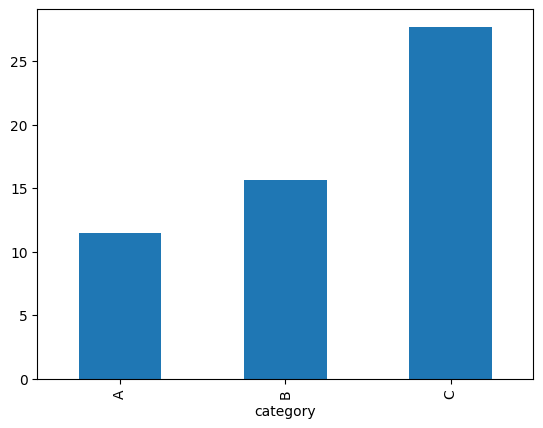

In [29]:
group=df.groupby("category")["value"].mean()
group.plot(kind="bar")
plt.savefig("data/processed/histogram.png")

In [44]:
def get_summary_stats(df):
    numeric_cols=df.select_dtypes(include='number').columns

    means = df.groupby('category')[numeric_cols].mean().reset_index()
    std = df.groupby('category')[numeric_cols].std().reset_index()

    means = means.rename(columns={col: f"{col}_mean" for col in numeric_cols})
    std = std.rename(columns={col: f"{col}_std" for col in numeric_cols})

    summary=pd.merge(means, std, on='category')
    return summary
print(get_summary_stats(df))
    

  category  value_mean  value_std
0        A   11.500000   1.290994
1        B   15.666667   2.081666
2        C   27.666667   2.516611
